# Lecture 1 の練習2

このシートは自習学習で本講義で必要なR言語の機能を一通り学びます。



# 1 準備

~~~
normdist.csv
mean45_1000.csv
mean50_1000.csv
~~~

を自分のパソコンにダウンロードしておいてください。

後でこのブラウザにアップロードできるよう、ファイルの位置をエクスプローラで確認しておいてください。


# 2 ファイル操作

ここでは以下を確認しましょう。

- ディレクトリ表示
- ファイル表示
- アップロード

## 2.1 ディレクトリ表示

notebook の左側のファイルマークをクリックすると以下のようにフォルダが表示されます。

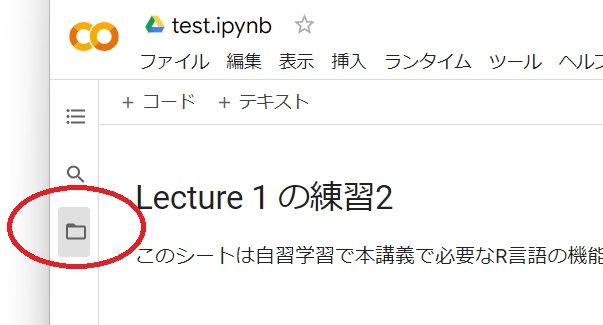

今、このフォルダには、sample_data というフォルダが一つだけあるはずです。

## 2.2 セッションストレージ

このフォルダはパソコンの中のフォルダでも、Google Drive の中のフォルダでもありません。今動かしている google colab のセッションの中に独自につくられたストレージの中にあるフォルダを表示しています。

セッションストレージは、google colab を起動すると、そのランタイムに付属して新たにつくられます。そしてこのストレージはGoogle Colab を終了するとリサイクルされて消えてしまいます。google colab を起動してから終了するまで、新品のストレージを使える、と考えてください。

そしてこのファイルシステムはランタイムのリサイクル時には、初期化されてしまいまいます。

演習ではここにファイルをアップロードしますが、セッションストレージがリサイクルされてしまうと、ファイルは消えてしまうから、その場合は再度アップロードが必要になります。またセッションストレージの中で永久に保存しておきたいファイルは、消えてしまう前にダウンロードしておく必要があります。

google drive をマウントする機能は、R 言語の場合は利用できません。

## 2.3 フォルダを R 言語の命令で確認

getwd でカレントディレクトリのパス、list.filesでカレントディレクトリにおけるファイル、フォルダ一覧を得ることができます。





In [ ]:
getwd()
list.files()

## 2.3 normal.csv のアップロード

ディレクトリの上の、ファイルアイコンに上矢印(↑)のアイコンでアップロードできます。

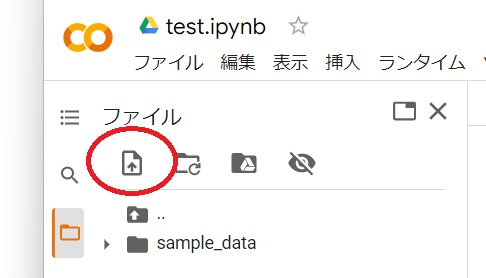

このアイコンを使って、

~~~
normdist.csv
mean45_1000.csv
mean50_1000.csv
~~~

をアップロードしてください。

「注: アップロードしたファイルはランタイムのリサイクル時に削除されます」

と警告がでますが、これは先に説明したようにセッションストレージはランタイムがリサイクルされると消えてしまうからです。

ではアップロードをしましょう。

そして次のコマンドでnormal.csv があることを確認しましょう。





In [ ]:
list.files()

# 2 csv ファイルの読み取り

normdist.csv がらデータフレームにデータを読み込んでみます。
head で最初の5レコードを表示します。

In [ ]:
x.df <- read.csv('normdist.csv')
mean50_1000.df <- read.csv('mean50_1000.csv')
mean45_1000.df <- read.csv('mean45_1000.csv')

In [ ]:
head(x.df)


# 3 Histグラム作成

ロードしたデータの平均をとってみましょう。

In [ ]:
mean(x[,1])
mean(mean45_1000[,1])
mean(mean50_1000[,1])

In [ ]:
hist(x.df[,1])

In [ ]:
hist(mean50_1000.df[,1],breaks=seq(0,100,5))

In [ ]:
hist(mean45_1000.df[,1],breaks=seq(0,100,5))

# 4 データフレームの作成

普通はファイルからデータを読み込んで計算に使いますが、プログラムコードで直にベクトルの形で数値を記述して、データフレームを作ることもできます。この方法はかなり面倒ですが、プログラムのテストには便利です。

## 4.1 ベクトルからデータフレームを作る

In [ ]:
x <- c(1.2,6.3,3.1,4.2,2.4)
y <- c(1.4,6.5,3.3,4.4,2.1)
z <- c(0.6,0.2,0.6,0.3,0.1)
d <- data.frame(col_x=x, col_y = y, col_z = z)
d

1桁目=x、2桁目=y、3桁目=z

という内容のデータフレームが作られました。

1桁目、2桁目の平均と標準偏差を求めてみます。



In [ ]:
mean(d[,1])
sd(d[,1])
mean(d[,2])
sd(d[,2])
mean(d[,3])
sd(d[,3])

## 4.2 データフレームの txt ファイルへの読み書き

データフレームはテキストファイルに書いたり、逆にテキストファイルをデータフレームに読み込めます。



In [ ]:
write.table(d, 'test.txt', sep = ',')

In [ ]:
df2= read.table('test.txt', sep = '\t')
df2

# 5 データフレームから相関を計算

相関をとるにはまずattach してからcor関数を使います。

attach は一度複数回行うとエラーになります。
毎回 detach すれば問題はありません。

使い終わったらすぐにdetachしておくきましょう。

~~~~
attach(d)
cor(col_x,col_y)
detach()
~~~~


In [ ]:
attach(d)
cor(col_x,col_y)
cor(col_z,col_x)
cor(col_z,col_y)

detach()  # <- これを必ずいれておきましょう

どの相関が大きいでしょうか?
どの相関はプラスでどの相関はマイナスでしょうか?

散布図をプロットしてみましょう。

In [ ]:
plot(d[,1],d[,2])

In [ ]:
plot(d[,2],d[,3])

In [ ]:
plot(d[,1],d[,3])

予想としては以下の相関はどうなるでしょう？

~~~
   退避           答えをここに書いてください
年収 : 年齢           [- , 0 , +]
体重 : 年齢           [- , 0 , +]
年収 : 年齢           [- , 0 , +]
西暦 : 平均気温       [- , 0 , +]
~~~

# 5 Dataset

Rでは data という関数で豊富なデータセットを利用できます。

以下ではiris というデータを読み込んでいます。

data で iris を読み込むと結果は iris というオブジェクトに残ります。

以下では iris を読み込んで、最初の5レコードを表示します。




In [ ]:
data(iris)
head(iris)

In [ ]:
attach(iris)
hist(Sepal.Length)
detach()

# 6 検定

以下のような検定が行える。`

t検定

t.test

カイ二乗検定

chisq.test

フィッシャーの正確確率検定

fishser.test

2要因が互いに無関係であることである．有意水準5%にて検定する


In [ ]:
# フィッシャーの正確確率検定
x = matrix(c(23,43,11,10),2,2)
fisher.test(x)

有意水準0.05のF検定をおこないます。
var.test でp-value が 0.05以下なら帰無仮説は棄却、0.05以上なら帰無仮説は保留されます。

In [ ]:
mean(mean45_1000[,1])
mean(mean50_1000[,1])



有意水準0.05のF検定をおこないます。 var.test でp-value が 0.05以下なら帰無仮説は棄却、0.05以上なら帰無仮説は保留されます。

In [ ]:
var.test(x=mean50_1000.df[,1],y=mean45_1000.df[,1])

次にt 検定を行います。

In [ ]:
t.test(x=mean50_1000.df[,1],y=mean45_1000.df[,1],var.equal=T,paired=F)

p=2.2e-16 なので、帰無仮説は否決された。

練習問題

データ数を減らすとp-value が大きくなることを確認してください。

有意水準1%を上回る(p値が1%より大きくなる)データ数になるまでデータ数を減らしてみてください。

データ数100で、平均値を少しずつ増やし、有意水準1%で帰無仮説が保留される平均値を探してみましょう。